In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
data = pd.read_csv("churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Exploration 

In [6]:
data.drop('customerID', axis = 'columns' ,inplace = True)

In [7]:
data.shape

(7043, 20)

In [8]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull().sum()

11

In [12]:
data[pd.to_numeric(data.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data1 = data[data.TotalCharges != ' ']
data1.shape

(7032, 20)

In [14]:
pd.to_numeric(data1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

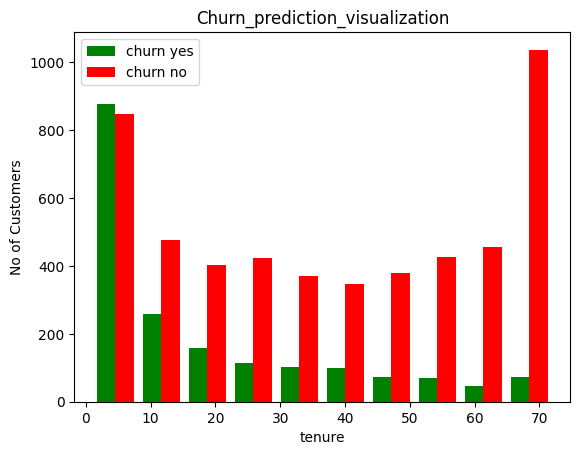

In [15]:
tenure_churn_yes = data1[data1.Churn == 'Yes'].tenure
tenure_churn_No = data1[data1.Churn == 'No'].tenure

plt.xlabel('tenure')
plt.ylabel('No of Customers')
plt.title('Churn_prediction_visualization')
plt.hist([tenure_churn_yes,tenure_churn_No], color=['green','red'],label = ['churn yes','churn no'])
plt.legend()

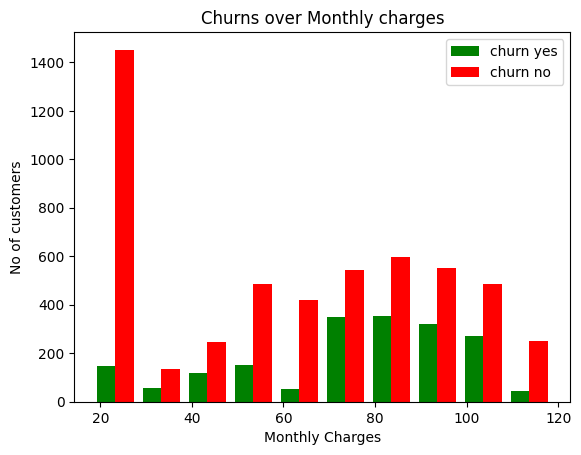

In [16]:
mon_churn_yes = data1[data1.Churn == 'Yes'].MonthlyCharges
mon_churn_no = data1[data1.Churn == 'No'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.title('Churns over Monthly charges')
plt.hist([mon_churn_yes,mon_churn_no], color = ('green','red'), label = ('churn yes','churn no'))
plt.legend()

In [17]:
def unique_in_col(data1):
    for col in data1:
        if data1[col].dtypes == 'object':
            print(f'{col} : {data1[col].unique()}')

In [18]:
unique_in_col(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [19]:
data1.replace('No internet service','No', inplace = True)
data1.replace('No phone service','No', inplace = True)

C:\Users\Aman\AppData\Local\Temp\ipykernel_6976\3811300870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No internet service','No', inplace = True)
C:\Users\Aman\AppData\Local\Temp\ipykernel_6976\3811300870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace('No phone service','No', inplace = True)


In [20]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    data1[col].replace({'Yes':1,'No':0}, inplace = True)



C:\Users\Aman\AppData\Local\Temp\ipykernel_6976\175790933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].replace({'Yes':1,'No':0}, inplace = True)


In [21]:
data1['gender'].replace({'Female':1, 'Male':0},inplace = True)

C:\Users\Aman\AppData\Local\Temp\ipykernel_6976\2885925882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['gender'].replace({'Female':1, 'Male':0},inplace = True)


In [22]:
for col in data1:
    print(f'{col} : {data1[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : [0 1]


# Onehot Encoding 

In [23]:
finaldata = pd.get_dummies(data = data1, columns=['InternetService','Contract','PaymentMethod'])
finaldata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
finaldata.tail(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
7042,0,0,0,0,66,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0


In [25]:
col_scaler = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
finaldata[col_scaler] = scaler.fit_transform(finaldata[col_scaler])

In [26]:
finaldata.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [27]:
finaldata.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5362,0,0,1,1,0.901408,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2531,1,0,1,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4024,1,0,0,0,0.084507,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
5455,1,0,0,0,0.070423,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5177,0,1,1,0,0.492958,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Train and Test On Data

In [76]:
x = finaldata.drop('Churn', axis = 'columns')
y = finaldata.Churn

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

In [29]:
x_train.shape

(5625, 26)

In [30]:
x_test.shape

(1407, 26)

# Deep- Learning model Training 

In [75]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [77]:
ANN(x_train,y_train,x_test, y_test,'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5219 - accuracy: 0.7381
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8004
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8103
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4083 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8073
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8087
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4046 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4038 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 0.8343
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8320
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8293
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8311
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3656 - accuracy: 0.8268
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8318
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8325
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8322
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8327
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [33]:
y_pred = model.predict(x_test)
y_pred[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.01443135],
       [0.40338698],
       [0.01696522],
       [0.7842136 ],
       [0.47360963]], dtype=float32)

In [35]:
y_res[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [36]:
y_test[:10]

C:\Users\Aman\AppData\Local\Temp\ipykernel_6976\2588316582.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:10]


2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

# Result Accuracy Score

In [37]:
print(classification_report(y_test,y_res))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.63      0.52      0.57       408

    accuracy                           0.77      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(58.222222222222214, 0.5, 'true value')

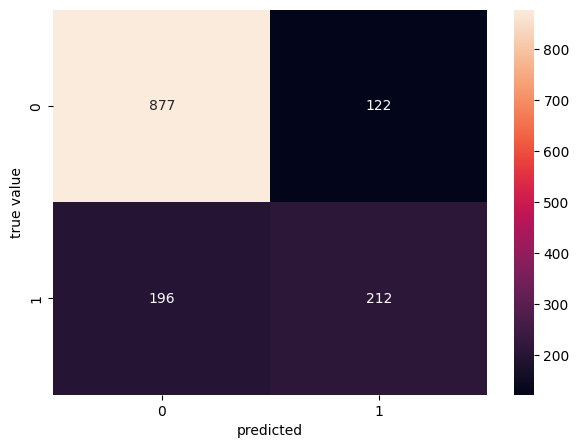

In [39]:
cm = tf.math.confusion_matrix(labels= y_test,predictions= y_res)
plt.figure(figsize= (7,5))
sns.heatmap(cm , annot = True, fmt= 'd')
plt.xlabel('predicted')
plt.ylabel('true value')

# Handling Imbalanced Data 
Method 1:under sample the majority value

In [51]:
churn_0_value_count, churn_1_value_count = finaldata.Churn.value_counts()

churn_0 = finaldata[finaldata['Churn'] == 0]
churn_1 = finaldata[finaldata['Churn'] == 1]

In [53]:
churn_0.shape

(5163, 27)

In [55]:
churn_1.shape

(1869, 27)

In [56]:
churn_0_under = churn_0.sample(churn_1_value_count)
churn_0_under.shape

(1869, 27)

In [82]:
df_test_data = pd.concat([churn_0_under,churn_1], axis = 0)

print(df_test_data.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [83]:
x_method1 = df_test_data.drop('Churn',axis= 'columns')
y_method1 = df_test_data.Churn

x_train,x_test,y_train,y_test = train_test_split(x_method1,y_method1,test_size = 0.2,random_state = 5, stratify = y_method1)

In [85]:
ANN(x_train,y_train,x_test, y_test,'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6192 - accuracy: 0.6689
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5212 - accuracy: 0.7518
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.7575
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7579
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7622
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7612
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7712
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8094
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8100
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8084
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8090
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8107
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8087
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8127
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8107
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8057
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8090
Epoch 93/100


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

# Method 2: over sampling the minority value